- Define one simple unbalanced classification tasks and solve it with Decision Tree or KNN. 
- If the dataset is already unbalanced leave it as it is, otherwise turns the dataset into an imbalanced version (e.g., 96% - 4%, for binary classification).
- Then solve the classification task using the Decision Tree or KNN by adopting at least 2 techniques of imbalanced learning (Undersampling, Oversampling).

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
df_test = pd.read_csv("/content/Test_ripulito")
df_train = pd.read_csv("/content/Train_ripulito")

In [3]:
df_test = df_test.drop(columns=['Unnamed: 0'], axis = 1)
df_train = df_train.drop(columns=['Unnamed: 0'], axis = 1)

In [4]:
df_train_copy = df_train
df_test_copy = df_test

In [5]:
t_train = df_train.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])

In [6]:
t_test = df_test.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])

In [7]:
columns_train = []
columns_train = t_train.columns

In [8]:
columns_test = []
columns_test = t_test.columns

In [ ]:
#columns_train

In [9]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(t_train)
#print(x_train_norm)
x_test_norm = scaler.transform(t_test)
#print(x_test_norm)

In [10]:
df_trainNORM = pd.DataFrame(x_train_norm, columns = columns_train)
df_testNORM = pd.DataFrame(x_test_norm, columns = columns_test)

In [11]:
"""df_trainNORM = df_trainNORM.assign(vocal_channel = df_train_copy['vocal_channel'].values)
df_trainNORM = df_trainNORM.assign(statement = df_train_copy['statement'].values)
df_trainNORM = df_trainNORM.assign(repetition = df_train_copy['repetition'].values)
df_trainNORM = df_trainNORM.assign(sex = df_train_copy['sex'].values)
df_trainNORM = df_trainNORM.assign(filename = df_train_copy['filename'].values)
df_trainNORM = df_trainNORM.assign(emotional_intensity = df_train_copy['emotional_intensity'].values)"""
df_trainNORM = df_trainNORM.assign(emotion = df_train_copy['emotion'].values)

In [ ]:
#df_trainNORM.head()

In [12]:
"""df_testNORM = df_testNORM.assign(vocal_channel = df_test_copy['vocal_channel'].values)
df_testNORM = df_testNORM.assign(emotion = df_test_copy['emotion'].values)
df_testNORM = df_testNORM.assign(statement = df_test_copy['statement'].values)
df_testNORM = df_testNORM.assign(repetition = df_test_copy['repetition'].values)
df_testNORM = df_testNORM.assign(sex = df_test_copy['sex'].values)
df_testNORM = df_testNORM.assign(filename = df_test_copy['filename'].values)
df_testNORM = df_testNORM.assign(emotional_intensity = df_test_copy['emotional_intensity'].values)"""
df_testNORM = df_testNORM.assign(emotion = df_test_copy['emotion'].values)

In [ ]:
#df_testNORM

In [13]:
train_happy = []
for value in df_trainNORM['emotion']:
  if(value == 'happy'):
    train_happy.append(1)
  else:
    train_happy.append(0)

In [14]:
df_trainNORM = df_trainNORM.assign(happy = train_happy)

In [15]:
df_trainNORM.head()

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,emotion,happy
0,0.014359,-0.780862,0.603864,-0.063106,-0.7693,0.553248,2.240420,0.027433,0.721621,0.242969,...,-4.354785,0.161158,1.464469,-1.662807,-0.801125,0.036057,9.400360,-3.035005,neutral,0
1,0.011053,-0.767068,0.603864,-0.063106,-0.7693,0.770118,2.458241,0.027433,0.721621,-0.028555,...,-0.659640,-0.173413,1.013307,-1.528958,2.023855,0.036057,-0.186504,0.434538,neutral,0
2,0.014884,-0.728019,0.622665,-0.063106,-0.7693,0.851346,3.056536,-0.048433,0.721621,0.320045,...,-3.086640,-0.286208,1.079310,-1.053483,-0.801125,0.036057,2.891302,-1.463754,neutral,0
3,0.013772,-0.737654,0.603864,-0.063106,-0.7693,1.562804,4.240412,-0.010500,0.721621,0.277297,...,-0.396009,-0.588962,0.937320,-1.193498,1.349146,0.036057,-0.049566,-0.052845,neutral,0
4,0.013562,-0.831819,0.603864,-0.063106,-0.7693,0.286970,1.604752,-0.010500,0.721621,0.034581,...,-0.624456,0.170902,1.010298,-1.288440,1.058747,0.036057,0.878701,-0.532241,calm,0


In [16]:
test_happy = []
for value in df_testNORM['emotion']:
  if(value == 'happy'):
    test_happy.append(1)
  else:
    test_happy.append(0)

In [17]:
df_testNORM = df_testNORM.assign(happy = test_happy)

In [18]:
df_testNORM.head()

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,emotion,happy
0,0.049885,-0.795878,0.566262,-0.063106,-0.66600,0.013057,-0.691127,-0.048433,0.603131,-0.428235,...,0.089520,0.032398,1.230865,-1.412105,1.528941,0.036057,0.380443,-0.407209,neutral,0
1,0.011680,-0.804879,0.547461,-0.063106,-0.66600,0.344246,-0.716573,-0.351899,0.603131,-0.026953,...,0.185582,-0.837184,0.570167,-0.598055,0.396989,0.036057,0.163243,-0.454832,neutral,0
2,-0.065647,-0.811989,0.585063,-0.063106,-0.70732,-0.538658,-1.455630,0.255033,0.603131,0.450592,...,0.407398,-0.497760,0.670446,-0.420531,-0.693463,0.036057,1.523245,-1.137587,neutral,0
3,-0.009873,-0.773573,0.566262,-0.063106,-0.68666,0.476404,-1.718222,-0.200166,0.603131,0.016167,...,0.870601,-0.191064,1.087369,-1.246913,1.723417,0.036057,-0.347161,0.014413,neutral,0
4,0.015127,-0.889868,0.585063,-0.063106,-0.68666,-0.350507,-2.957733,-0.124300,0.603131,2.719930,...,-1.252102,0.547445,1.038500,-1.079638,1.477193,0.036057,0.024425,-0.362935,calm,0


lasciamo lo sbilanciamento di emotional_intensity originale sul train set

In [19]:
#classe da sbilanciare
class_name = 'happy'

In [20]:
#sbilanciamento train
attributes = [col for col in df_trainNORM.columns if col != class_name]
X = df_trainNORM[attributes].values
y = df_trainNORM[class_name]

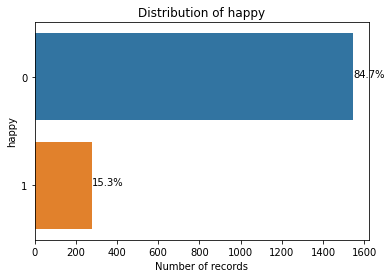

In [21]:
ax = sns.countplot(y="happy", data=df_trainNORM)
plt.title('Distribution of happy')
plt.xlabel('Number of records')
total = len(df_trainNORM['happy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [22]:
df_trainNORM['happy'].value_counts()

0    1548
1     280
Name: happy, dtype: int64

lasciamo lo sbilanciamento originale di emotional_intensity sul Test Set

In [23]:
#sbilanciamento test
attributes2 = [col for col in df_testNORM.columns if col != class_name]
X = df_testNORM[attributes2].values
y = df_testNORM[class_name]

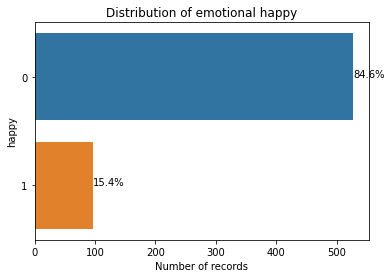

In [24]:
ax = sns.countplot(y="happy", data=df_testNORM)
plt.title('Distribution of emotional happy')
plt.xlabel('Number of records')
total = len(df_testNORM['happy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [25]:
df_testNORM['happy'].value_counts()

0    528
1     96
Name: happy, dtype: int64

In [26]:
!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import KFold, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
X_train = df_trainNORM.drop(columns = ['happy','emotion'])
y_train = df_trainNORM[['happy']]
X_test = df_testNORM.drop(columns = ['happy', 'emotion'])
y_test = df_testNORM[['happy']]
#0 not happy e 1 happy

In [28]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedStratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

Prove mantenendo ancora lo sbilanciamento sui dataset normalizzati

In [29]:
from sklearn.dummy import DummyClassifier

In [30]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.8461538461538461
F1-score [0.91666667 0.        ]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       528
           1       0.00      0.00      0.00        96

    accuracy                           0.85       624
   macro avg       0.42      0.50      0.46       624
weighted avg       0.72      0.85      0.78       624



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


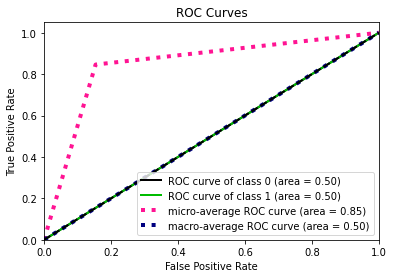

In [31]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_train, y_train, dt, check_params, "f1_macro")


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 15}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.680 (+/-0.056) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.677 (+/-0.057) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.676 (+/-0.056) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.673 (+/-0.060) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.671 (+/-0.057) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.671 (+/-0.057) for {'criterion': '

In [192]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 9,
  'min_samples_split': 15}}

In [33]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 9, min_samples_split = 15, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.7692307692307693
F1-score [0.86691312 0.13253012]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       528
           1       0.16      0.11      0.13        96

    accuracy                           0.77       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.74      0.77      0.75       624



In [34]:
#ROC CURVE
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

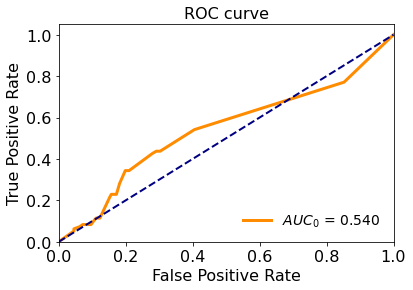

In [35]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
#roc curve con decision tree allenato sui dati non bilanciati

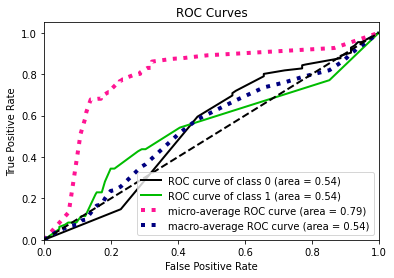

In [36]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

Accuracy 0.8157051282051282
F1-score [0.89759573 0.08      ]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       528
           1       0.17      0.05      0.08        96

    accuracy                           0.82       624
   macro avg       0.51      0.50      0.49       624
weighted avg       0.74      0.82      0.77       624



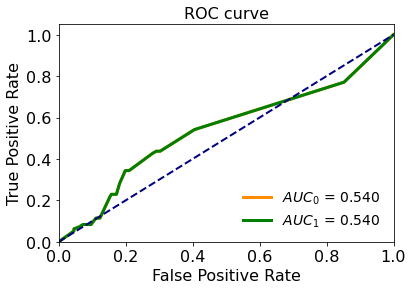

In [37]:
#DECISION TREE
clf = DecisionTreeClassifier(criterion ='gini', max_depth = 10, min_samples_leaf = 9, min_samples_split = 15, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.9)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [38]:
#PCA
from sklearn.decomposition import PCA


In [39]:
X_train.shape

(1828, 197)

In [40]:
#uso screen plot per scegliere il numero di componenti --> 
#il numero di componenti da estrarre il numero di componenti da estrarre è quello che coincide con il cambio di pendenza, 
#ovvero con il gomito della curva, dopo il quale in genere la spezzata tende ad appiattirsi.
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

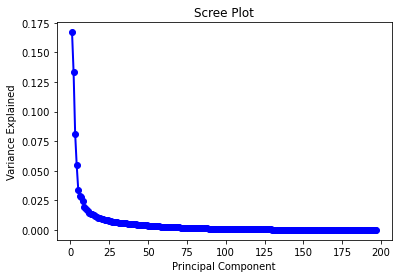

In [41]:
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
#plt.figure(figsize=(40,39))
plt.show()

In [42]:
pca = PCA(n_components = 2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [43]:
X_pca.shape

(1828, 2)

In [44]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([1548,  280])), (array([0, 1]), array([528,  96])))

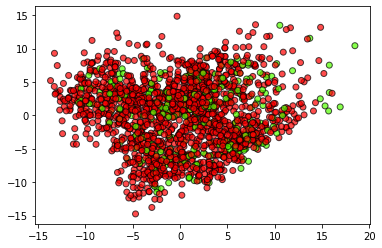

In [45]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train['happy'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

UNDERSAMPLING


In [46]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from collections import defaultdict

RandomUnderSampler

In [47]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 280, 1: 280})


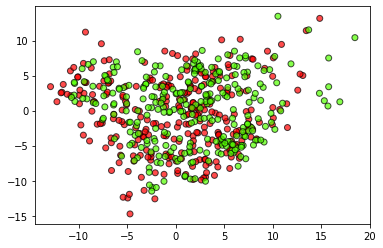

In [48]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [211]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.795 (+/-0.035) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.794 (+/-0.034) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.790 (+/-0.035) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.782 (+/-0.034) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.788 (+/-0.034) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.789 (+/-0.033) for {'criterion': 'gi

In [212]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 4,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.5785256410256411
F1-score [0.69735328 0.3060686 ]
              precision    recall  f1-score   support

           0       0.89      0.57      0.70       528
           1       0.20      0.60      0.31        96

    accuracy                           0.58       624
   macro avg       0.55      0.59      0.50       624
weighted avg       0.78      0.58      0.64       624



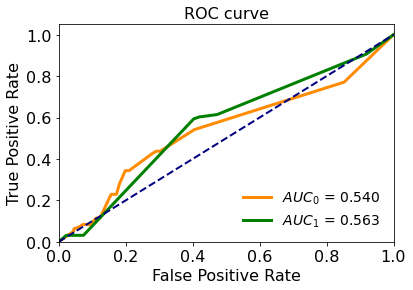

In [49]:
#DECISION TREE
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [214]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.788 (+/-0.025) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.734 (+/-0.029) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [215]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}}

Accuracy 0.6057692307692307
F1-score [0.71981777 0.33513514]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       528
           1       0.23      0.65      0.34        96

    accuracy                           0.61       624
   macro avg       0.56      0.62      0.53       624
weighted avg       0.80      0.61      0.66       624



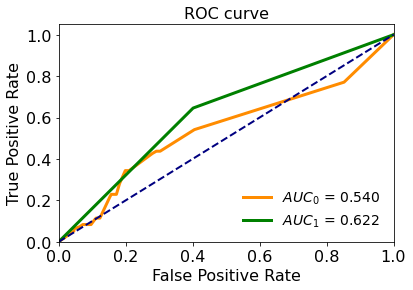

In [50]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Condensed Nearest Neighbors

In [51]:
import warnings
warnings.simplefilter("ignore")

In [52]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)   #n_jobs numero di processori da utilizzare 
X_res, y_res = cnn.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 430, 1: 280})


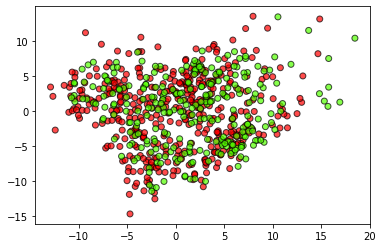

In [53]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [220]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 20}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.723 (+/-0.112) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.722 (+/-0.113) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.722 (+/-0.112) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.715 (+/-0.113) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.718 (+/-0.117) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.721 (+/-0.114) for {'criterion': 'g

In [221]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 8,
  'min_samples_leaf': 7,
  'min_samples_split': 20}}

Accuracy 0.6955128205128205
F1-score [0.80808081 0.26356589]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       528
           1       0.21      0.35      0.26        96

    accuracy                           0.70       624
   macro avg       0.54      0.56      0.54       624
weighted avg       0.76      0.70      0.72       624



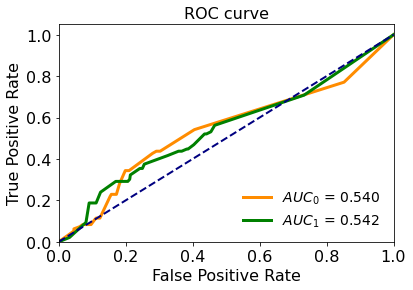

In [54]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 7, min_samples_split = 20, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [223]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.740 (+/-0.027) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.641 (+/-0.034) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'd

In [224]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}}

Accuracy 0.717948717948718
F1-score [0.82186235 0.32307692]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       528
           1       0.26      0.44      0.32        96

    accuracy                           0.72       624
   macro avg       0.57      0.60      0.57       624
weighted avg       0.79      0.72      0.75       624



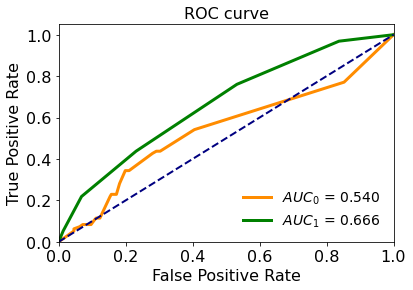

In [55]:
#KNN
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Tomek Links


In [56]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1517, 1: 280})


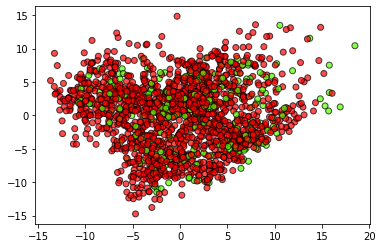

In [57]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [228]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 20}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.669 (+/-0.060) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.667 (+/-0.061) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.666 (+/-0.063) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.663 (+/-0.063) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.662 (+/-0.064) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.662 (+/-0.064) for {'criterion': '

In [229]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 7,
  'min_samples_split': 20}}

Accuracy 0.7628205128205128
F1-score [0.86011342 0.22105263]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       528
           1       0.22      0.22      0.22        96

    accuracy                           0.76       624
   macro avg       0.54      0.54      0.54       624
weighted avg       0.76      0.76      0.76       624



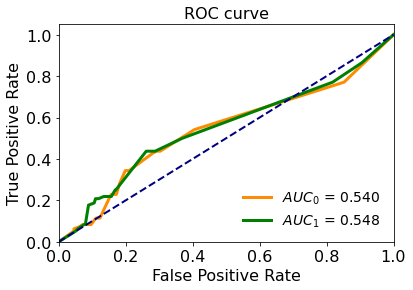

In [58]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf= 7, min_samples_split = 20, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [231]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.770 (+/-0.027) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.552 (+/-0.030) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [232]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}}

Accuracy 0.7612179487179487
F1-score [0.85768863 0.25870647]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       528
           1       0.25      0.27      0.26        96

    accuracy                           0.76       624
   macro avg       0.56      0.56      0.56       624
weighted avg       0.77      0.76      0.77       624



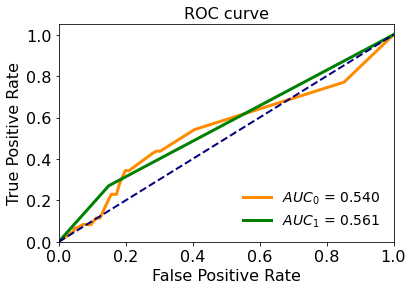

In [59]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Edit Nearest Neighbours

In [60]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1136, 1: 280})


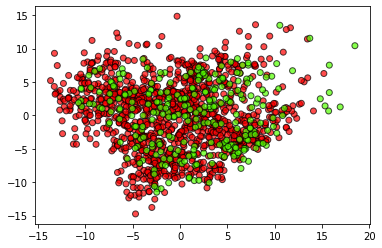

In [61]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [62]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.728 (+/-0.068) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.728 (+/-0.068) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.723 (+/-0.071) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.721 (+/-0.072) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.724 (+/-0.068) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.724 (+/-0.068) for {'criterion':

In [63]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 5}}

Accuracy 0.7275641025641025
F1-score [0.83653846 0.18269231]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       528
           1       0.17      0.20      0.18        96

    accuracy                           0.73       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.74      0.73      0.74       624



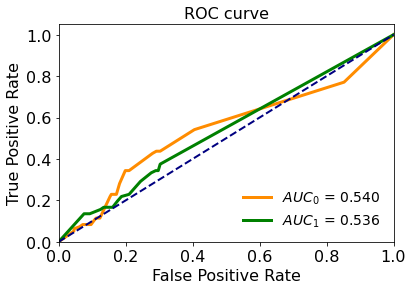

In [64]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 5, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [65]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.835 (+/-0.020) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.647 (+/-0.037) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [66]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}}

Accuracy 0.7035256410256411
F1-score [0.81180061 0.30188679]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       528
           1       0.24      0.42      0.30        96

    accuracy                           0.70       624
   macro avg       0.56      0.59      0.56       624
weighted avg       0.78      0.70      0.73       624



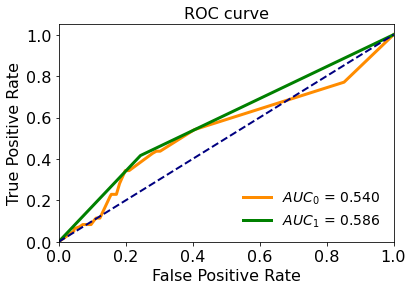

In [67]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Cluster Centroids

In [68]:
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids
#l'unico che usa il k-means

In [69]:
cc = ClusterCentroids(estimator=KMeans(n_init=1, random_state=0), random_state=42)
X_res, y_res = cc.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 280, 1: 280})


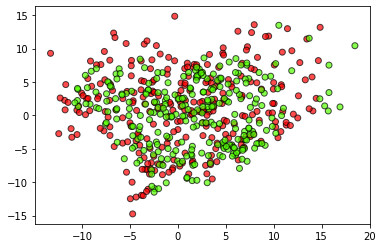

In [70]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [71]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.859 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.859 (+/-0.030) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.857 (+/-0.032) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.856 (+/-0.034) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.855 (+/-0.031) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.855 (+/-0.031) for {'criterion': 

In [72]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 8,
  'min_samples_leaf': 5,
  'min_samples_split': 5}}

Accuracy 0.44711538461538464
F1-score [0.55483871 0.27061311]
              precision    recall  f1-score   support

           0       0.87      0.41      0.55       528
           1       0.17      0.67      0.27        96

    accuracy                           0.45       624
   macro avg       0.52      0.54      0.41       624
weighted avg       0.76      0.45      0.51       624



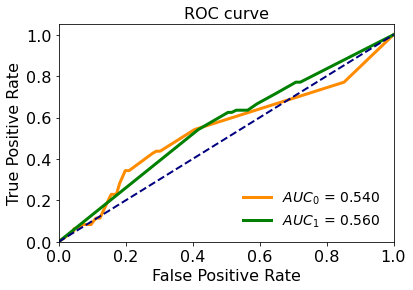

In [73]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 5, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [74]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.757 (+/-0.030) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.639 (+/-0.044) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [75]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}}

Accuracy 0.7291666666666666
F1-score [0.8318408  0.30452675]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       528
           1       0.25      0.39      0.30        96

    accuracy                           0.73       624
   macro avg       0.56      0.59      0.57       624
weighted avg       0.78      0.73      0.75       624



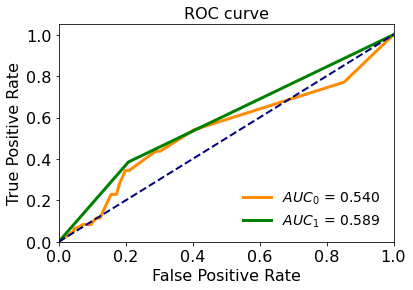

In [76]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

  OVERSAMPLING 

In [77]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

RandomOverSampler

In [78]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1548, 1: 1548})


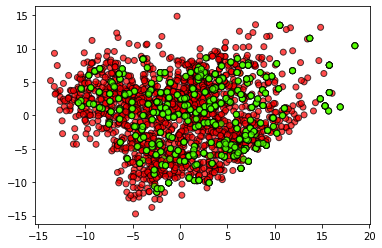

In [79]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [80]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.766 (+/-0.018) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.766 (+/-0.018) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.766 (+/-0.018) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.765 (+/-0.018) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.765 (+/-0.018) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.765 (+/-0.018) for {'criterion': 'g

In [81]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.7211538461538461
F1-score [0.826     0.2983871]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       528
           1       0.24      0.39      0.30        96

    accuracy                           0.72       624
   macro avg       0.56      0.58      0.56       624
weighted avg       0.78      0.72      0.74       624



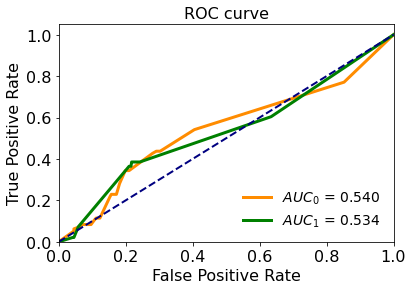

In [82]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [83]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.895 (+/-0.008) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.828 (+/-0.013) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [84]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}}

Accuracy 0.7708333333333334
F1-score [0.86419753 0.26666667]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       528
           1       0.26      0.27      0.27        96

    accuracy                           0.77       624
   macro avg       0.56      0.57      0.57       624
weighted avg       0.77      0.77      0.77       624



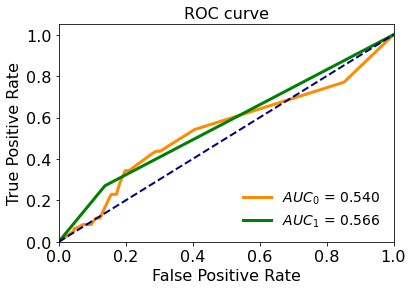

In [85]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

SMOTE


In [86]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1548, 1: 1548})


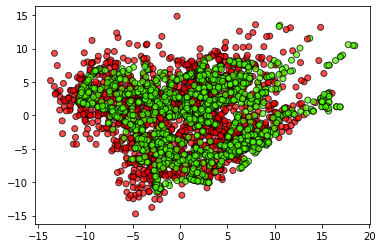

In [87]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [88]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.780 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.780 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.780 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.780 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.780 (+/-0.020) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.780 (+/-0.020) for {'criterion': 'g

In [89]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

Accuracy 0.6778846153846154
F1-score [0.7881981 0.3277592]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       528
           1       0.24      0.51      0.33        96

    accuracy                           0.68       624
   macro avg       0.56      0.61      0.56       624
weighted avg       0.79      0.68      0.72       624



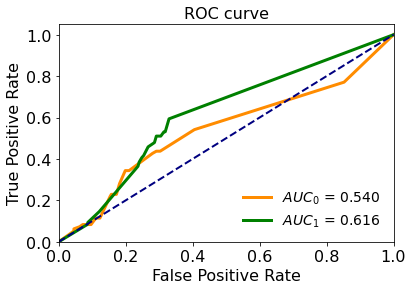

In [90]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 3, min_samples_split = 5, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [91]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.855 (+/-0.008) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.806 (+/-0.007) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [92]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}}

Accuracy 0.6746794871794872
F1-score [0.78609062 0.32107023]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       528
           1       0.24      0.50      0.32        96

    accuracy                           0.67       624
   macro avg       0.56      0.60      0.55       624
weighted avg       0.79      0.67      0.71       624



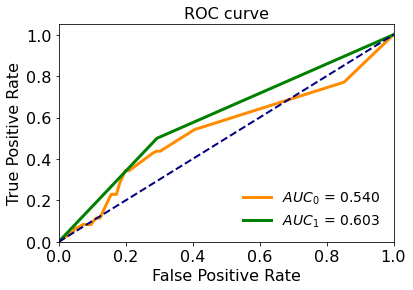

In [93]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

ADASYN

In [94]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1565, 0: 1548})


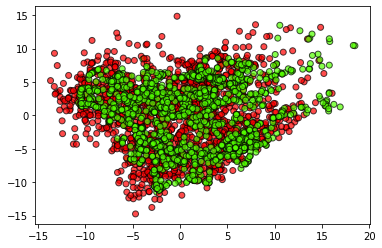

In [95]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [96]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_res, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.762 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.762 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.762 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.761 (+/-0.019) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.761 (+/-0.020) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.761 (+/-0.020) for {'criterion': '

In [97]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 10}}

Accuracy 0.7115384615384616
F1-score [0.81781377 0.30769231]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       528
           1       0.24      0.42      0.31        96

    accuracy                           0.71       624
   macro avg       0.56      0.59      0.56       624
weighted avg       0.78      0.71      0.74       624



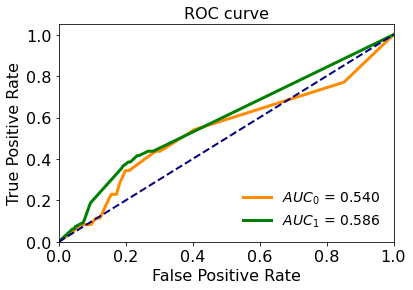

In [98]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 3, min_samples_split = 10, random_state=42)
clf .fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [99]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_res, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.851 (+/-0.008) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.797 (+/-0.009) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [100]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}}

Accuracy 0.6618589743589743
F1-score [0.77481323 0.32154341]
              precision    recall  f1-score   support

           0       0.89      0.69      0.77       528
           1       0.23      0.52      0.32        96

    accuracy                           0.66       624
   macro avg       0.56      0.60      0.55       624
weighted avg       0.79      0.66      0.71       624



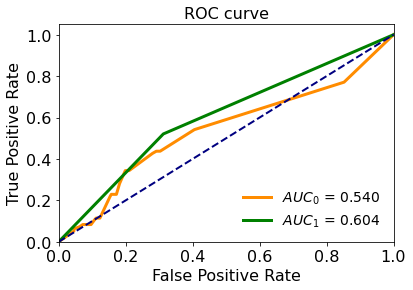

In [101]:
#KNN
clf = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Balancing at the Algorithm Level

Class Weight - Decision Tree

Accuracy 0.7003205128205128
F1-score [0.81684623 0.17621145]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       528
           1       0.15      0.21      0.18        96

    accuracy                           0.70       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.74      0.70      0.72       624



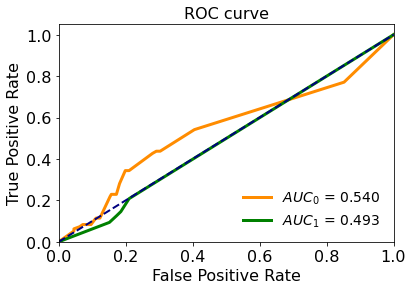

In [102]:
clf = DecisionTreeClassifier(min_samples_leaf=3, 
                             class_weight={0: 1, 1: 4}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()